In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folders = ['./TestesDefault/teste', './TestesMutacao2GeracionalCX/teste', './TestesGeracionalRoleta/teste', 
           './TestesMutacao2GeracionalRoletaCX/teste', './TestesPop50/teste', './TestesPop50Roleta/teste',
          './TestesRoletaCX/teste', './TestesRoletaPMX/teste']

In [3]:
folderName = './TestesMutacao2GeracionalRoletaCX/teste'
df0, df1, df2, df3, df4 = [pd.read_csv(folderName + str(i) + '.csv') for i in range(5)]
dfl = [df0, df1, df2, df3, df4]

result = pd.concat(dfl)
result = result.drop('Execução', axis=1)

In [4]:
result

,Execuções Necessárias,Fitness Médio,Desvio Padrão do Fitness,Número de Indivíduos Convergentes
0,0,0.195589,0.114758,1
1,0,0.198484,0.103501,1
2,50,0.190274,0.100645,1
3,156,0.176187,0.100959,1
4,0,0.200481,0.110821,1
...,...,...,...,...
25,0,0.196890,0.117733,1
26,154,0.199250,0.109496,1
27,468,0.180720,0.105698,1
28,504,0.179160,0.100987,1


In [5]:
sum(result['Número de Indivíduos Convergentes'])

155

In [6]:
def generateDataset(foldername):
    df0, df1, df2, df3, df4 = [pd.read_csv(foldername + str(i) + '.csv') for i in range(5)]
    dfl = [df0, df1, df2, df3, df4]

    result = pd.concat(dfl)
    result = result.drop('Execução', axis=1)
    return result

d, m2gcx, gr, m2grcx, p50, p50r, rcx, rpmx = [generateDataset(name) for name in folders]
datasets = [d, m2gcx, gr, m2grcx, p50, p50r, rcx, rpmx]

In [7]:
def getDF(column):
    
    fields = {}

    for i, j in zip(folders, datasets):
        fields[i[8:-6]] = list(j[column])
    df = pd.DataFrame(data=fields)
    return df

In [8]:
execs = getDF('Execuções Necessárias')

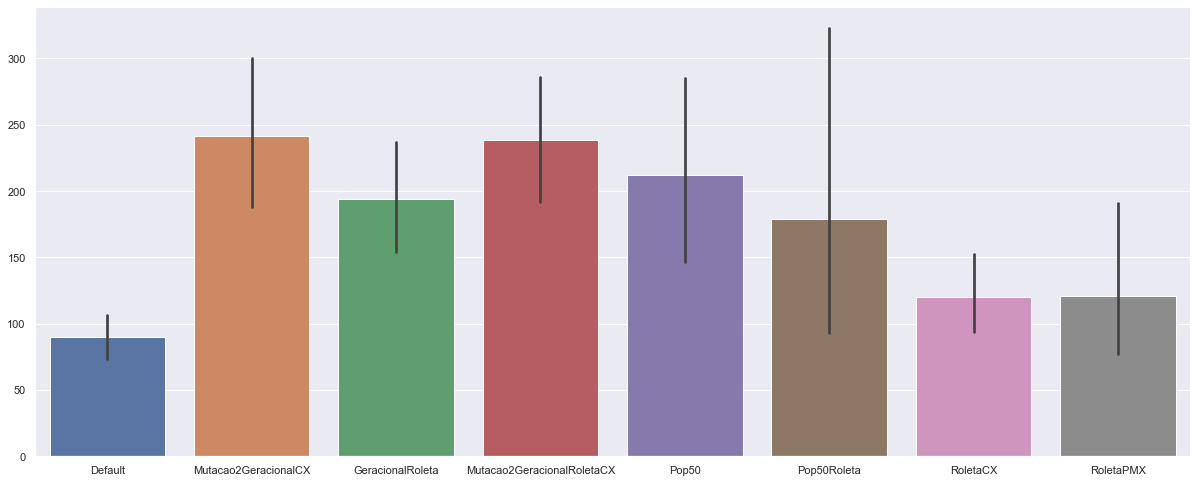

In [9]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
execsImg = sns.barplot(data=execs)
plt.savefig("execucoes.png")

In [ ]:
fitness = getDF('Fitness Médio')

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
fitImg = sns.barplot(data=fitness)
plt.savefig("fitness.png")

In [ ]:
fields = {}

for i, j in zip(folders, datasets):
    fields[i[8:-6]] = [sum(j['Número de Indivíduos Convergentes'])]
sumConvergentes = pd.DataFrame(data=fields)

sns.set(rc={'figure.figsize':(20.7,8.27)})
convImg = sns.barplot(data=sumConvergentes)
plt.savefig("convergencias.png")